,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


MD5('wangyue') = a203dfa74808f3d5e3aac80695d3b8a1
Seed integer: 215355048438470473692261985142042769569
Seed pool: [1034718603, 700822998, 1590344839, 763714860, 2029939794, 429580914, 1353587518, 1290937099, 17227676, 642711983]
Using 5 seeds: [1034718603, 700822998, 1590344839, 763714860, 2029939794]

Split 1 with seed 1034718603
Shapes -> Train (876, 81), Val (292, 81), Test (292, 81)
Training Linear Regression (seed=1034718603) ...
Training Ridge Regression (seed=1034718603) ...
Training Lasso Regression (seed=1034718603) ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+11, tolerance: 5.116e+08
  model = cd_fast.enet_coordinate_descent(


Training Random Forest (seed=1034718603) ...
Training XGBoost (seed=1034718603) ...

Split 2 with seed 700822998
Shapes -> Train (876, 81), Val (292, 81), Test (292, 81)
Training Linear Regression (seed=700822998) ...
Training Ridge Regression (seed=700822998) ...
Training Lasso Regression (seed=700822998) ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+11, tolerance: 5.727e+08
  model = cd_fast.enet_coordinate_descent(


Training Random Forest (seed=700822998) ...
Training XGBoost (seed=700822998) ...

Split 3 with seed 1590344839
Shapes -> Train (876, 81), Val (292, 81), Test (292, 81)
Training Linear Regression (seed=1590344839) ...
Training Ridge Regression (seed=1590344839) ...
Training Lasso Regression (seed=1590344839) ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.560e+11, tolerance: 5.415e+08
  model = cd_fast.enet_coordinate_descent(


Training Random Forest (seed=1590344839) ...
Training XGBoost (seed=1590344839) ...

Split 4 with seed 763714860
Shapes -> Train (876, 81), Val (292, 81), Test (292, 81)
Training Linear Regression (seed=763714860) ...
Training Ridge Regression (seed=763714860) ...
Training Lasso Regression (seed=763714860) ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+11, tolerance: 5.606e+08
  model = cd_fast.enet_coordinate_descent(


Training Random Forest (seed=763714860) ...
Training XGBoost (seed=763714860) ...

Split 5 with seed 2029939794
Shapes -> Train (876, 81), Val (292, 81), Test (292, 81)
Training Linear Regression (seed=2029939794) ...
Training Ridge Regression (seed=2029939794) ...
Training Lasso Regression (seed=2029939794) ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e+11, tolerance: 5.601e+08
  model = cd_fast.enet_coordinate_descent(


Training Random Forest (seed=2029939794) ...
Training XGBoost (seed=2029939794) ...


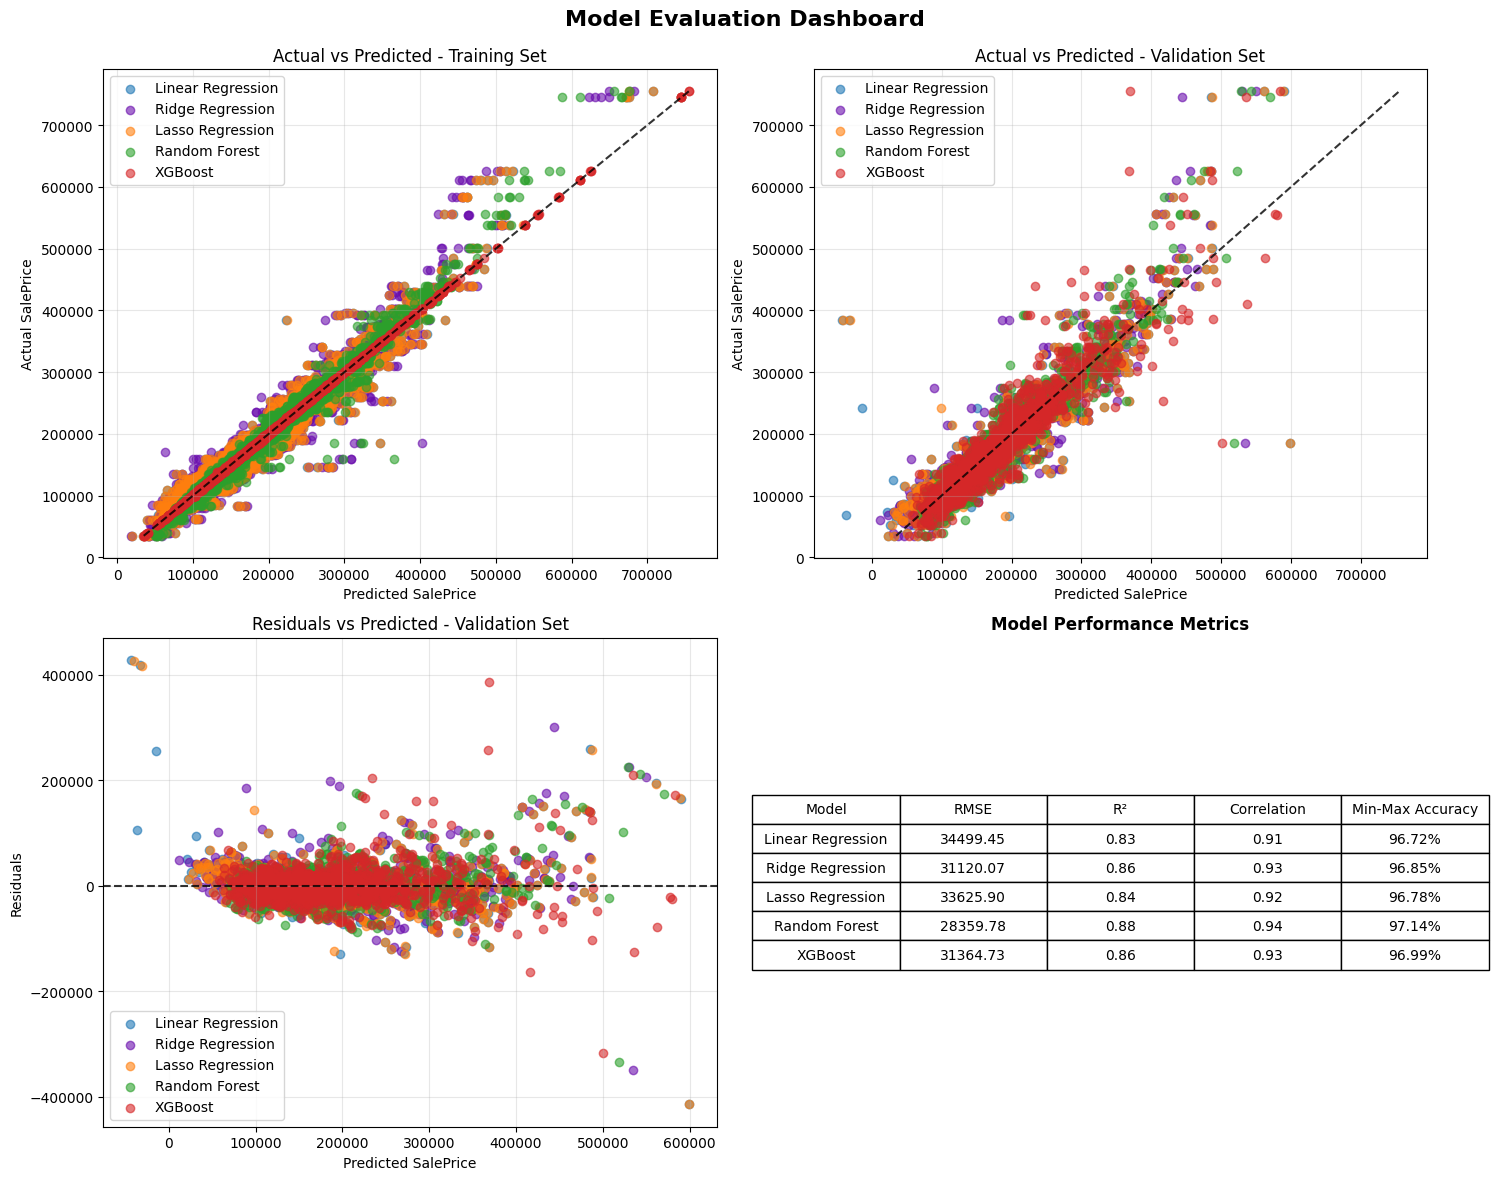

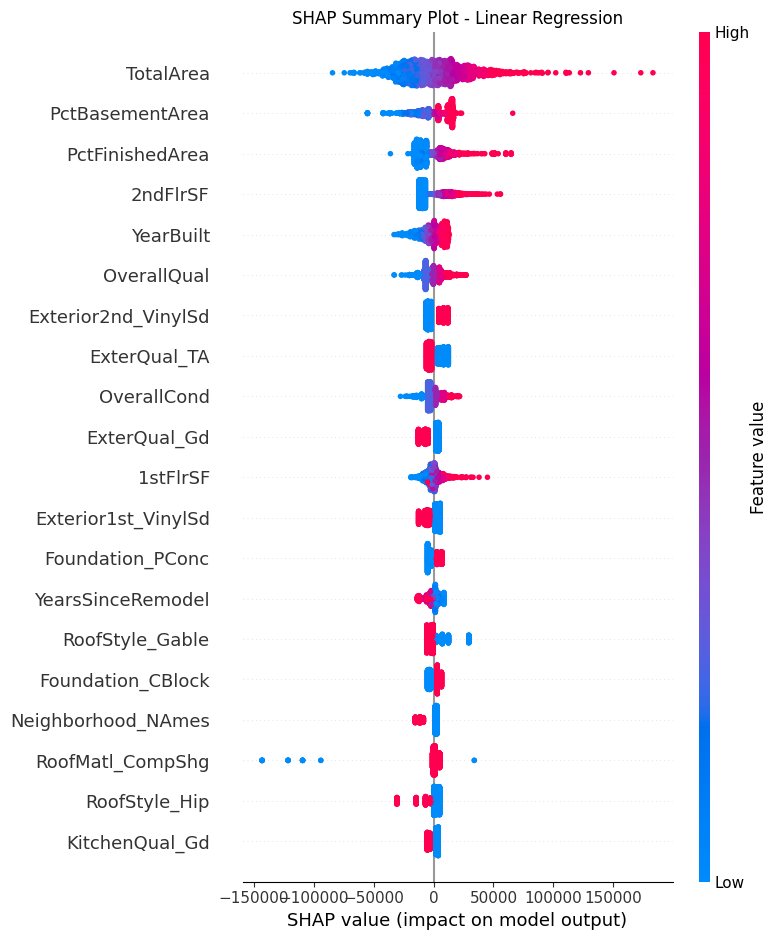

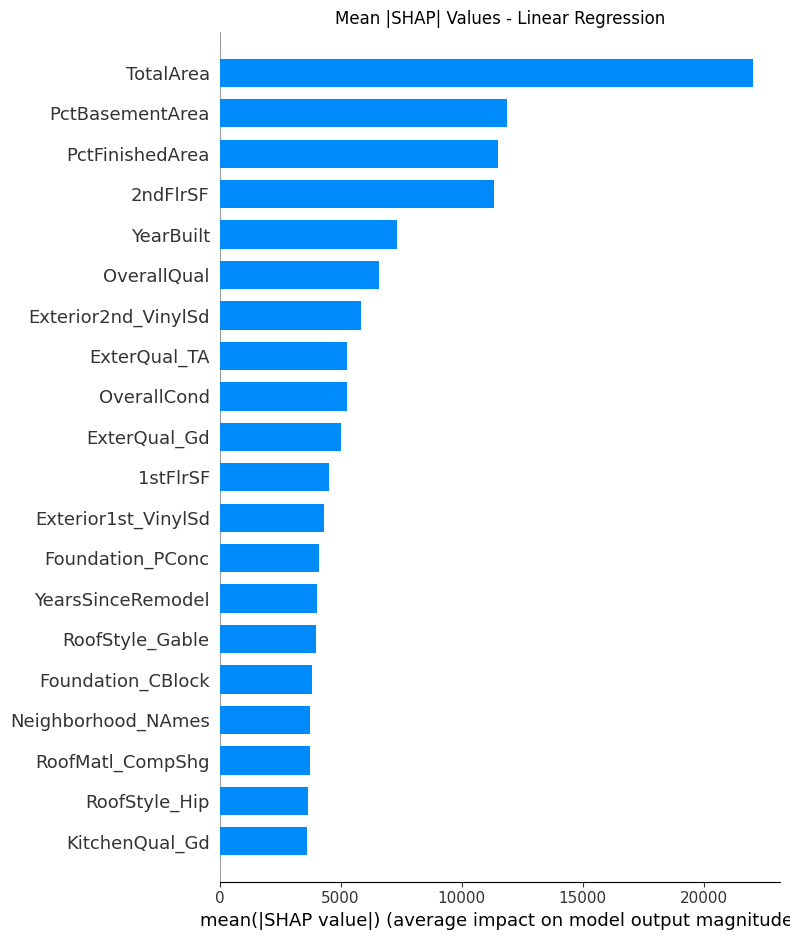

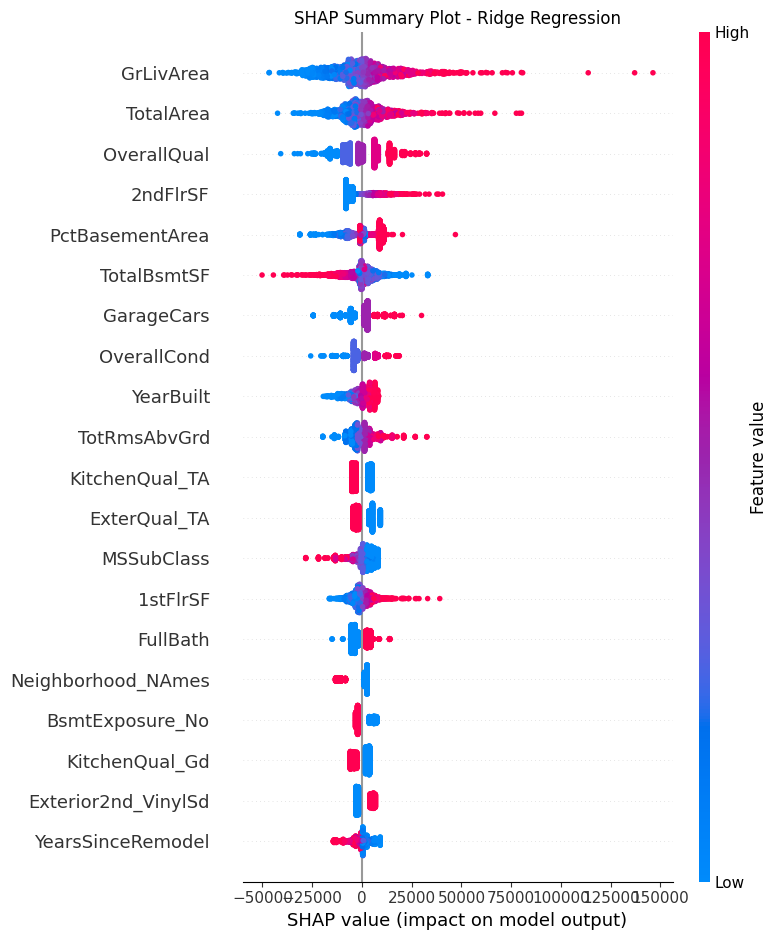

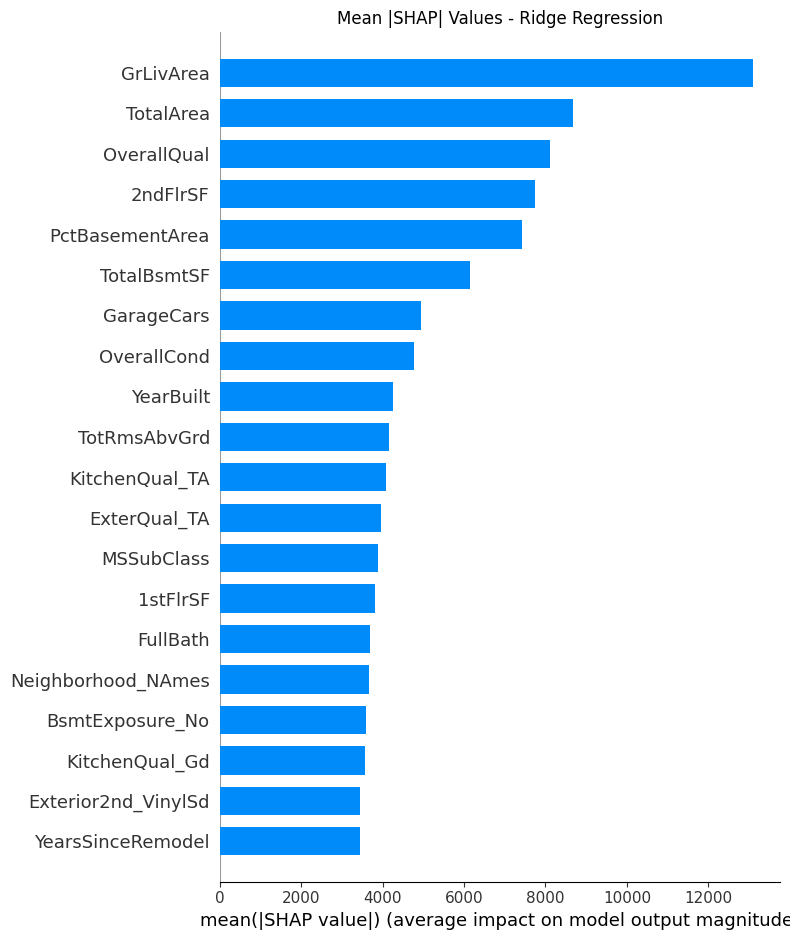

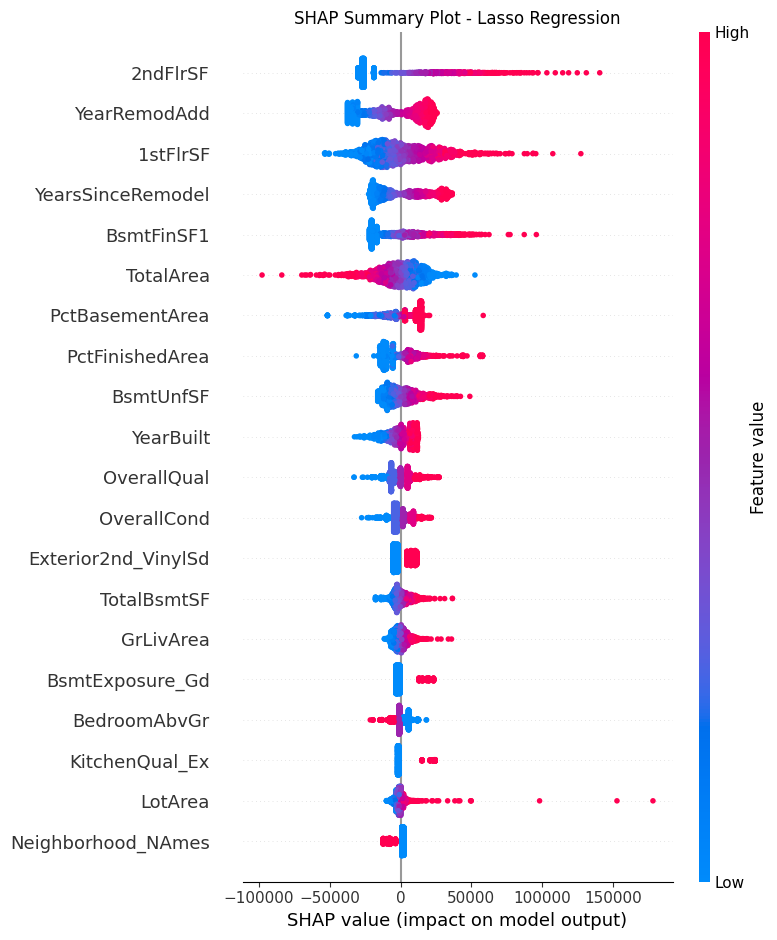

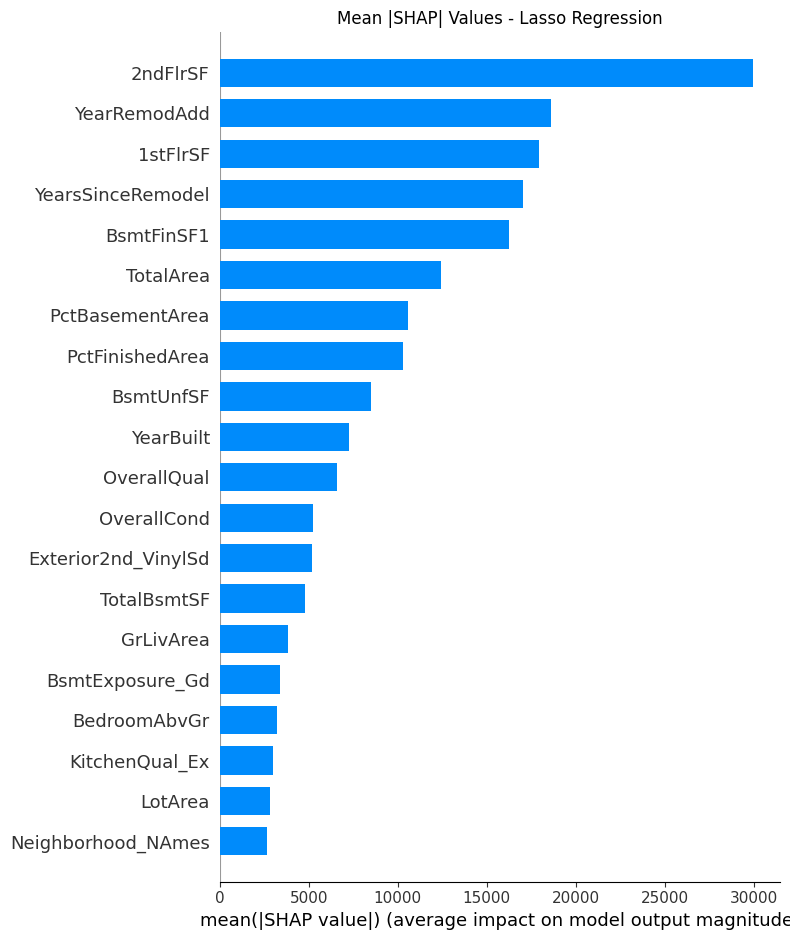

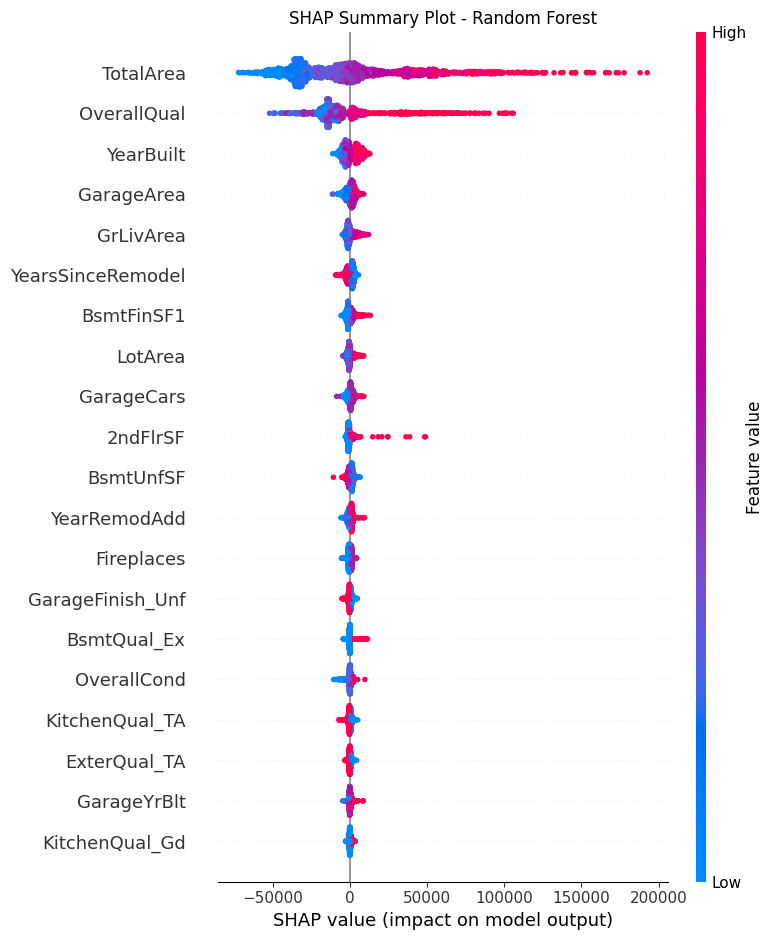

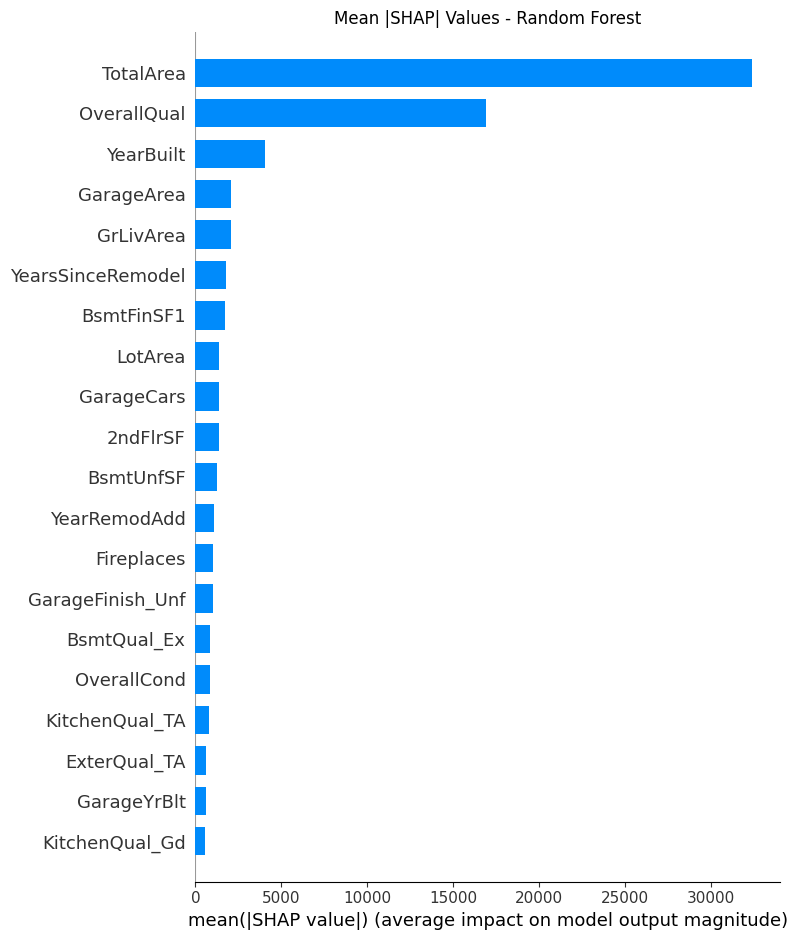

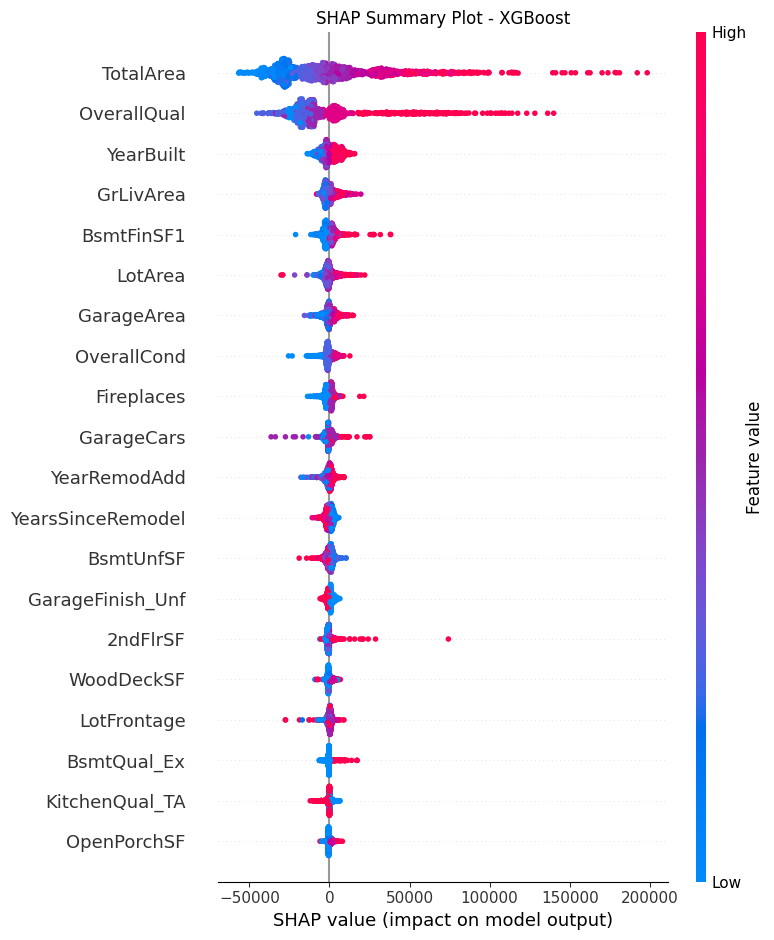

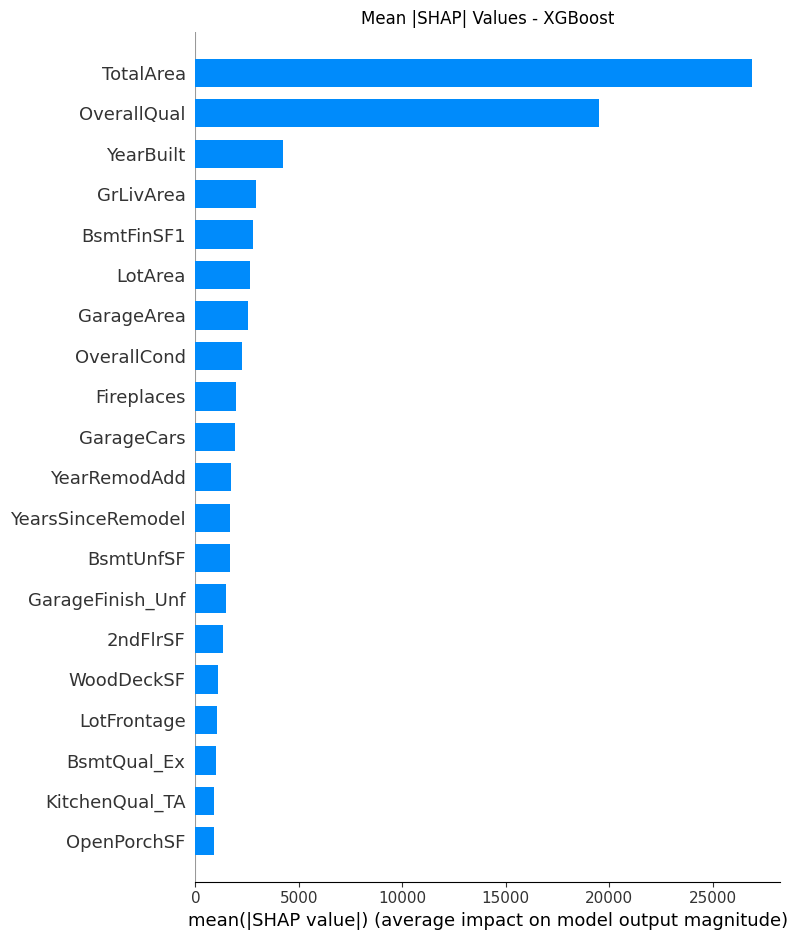

In [ ]:
# ==========================================
# 5-Seed Splits + Original Dashboard Formatting + Averaged Metrics + Averaged SHAP (beeswarm + bar)
# ==========================================
import pandas as pd
import numpy as np
import random, hashlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr
import shap
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
df = pd.read_csv('/content/train.csv')
display(df.head())

# -----------------------------
# Seed generation (MD5 -> 5 seeds)
# -----------------------------
def md5_hash(s: str) -> str:
    h = hashlib.md5(); h.update(s.encode('utf-8')); return h.hexdigest()

seed_string = "wangyue"
hashed_value = md5_hash(seed_string)
print(f"MD5('{seed_string}') = {hashed_value}")
number = int(hashed_value, 16)
print(f"Seed integer: {number}")
random.seed(number)
a, b = 0, 2**31 - 1
random_numbers = [random.randint(a, b) for _ in range(10)]
print("Seed pool:", random_numbers)
seeds = random_numbers[:5]
print("Using 5 seeds:", seeds)

# -----------------------------
# Helpers: imputations & features
# -----------------------------
def add_engineered_features(d):
    d["TotalArea"] = d["1stFlrSF"] + d["2ndFlrSF"] + d["TotalBsmtSF"]
    d["PctFinishedArea"] = d["GrLivArea"] / d["TotalArea"].replace(0, np.nan)
    d["PctBasementArea"] = d["TotalBsmtSF"] / d["GrLivArea"].replace(0, np.nan)
    d["YearsSinceRemodel"] = d["YrSold"] - d["YearRemodAdd"]
    d.fillna(0, inplace=True)
    return d

def preprocess(df_train, df_val, df_test):
    # Categorical impute
    cat_cols = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond','BsmtCond',
                'BsmtFinType1','BsmtExposure','BsmtQual','BsmtFinType2','Electrical']
    for col in cat_cols:
        if col in df_train.columns:
            mode_v = df_train[col].mode()[0]
            for d in (df_train, df_val, df_test):
                d[col] = d[col].fillna(mode_v)

    # Numeric impute
    num_cols = ['LotFrontage','GarageYrBlt','MasVnrArea']
    for col in num_cols:
        if col in df_train.columns:
            med = df_train[col].median()
            for d in (df_train, df_val, df_test):
                d[col] = d[col].fillna(med)

    # Engineered features
    for d in (df_train, df_val, df_test):
        add_engineered_features(d)

    # Split X/y
    X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
    X_val,   y_val   = df_val.drop("SalePrice", axis=1),   df_val["SalePrice"]
    X_test,  y_test  = df_test.drop("SalePrice", axis=1),  df_test["SalePrice"]

    # One-hot
    cat = X_train.select_dtypes(include=['object']).columns
    X_train = pd.get_dummies(X_train, columns=cat, dummy_na=False)
    X_val   = pd.get_dummies(X_val,   columns=cat, dummy_na=False)
    X_test  = pd.get_dummies(X_test,  columns=cat, dummy_na=False)

    # Align
    X_val  = X_val.reindex(columns=X_train.columns, fill_value=0)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    # Drop Id if exists
    if 'Id' in X_train.columns:
        X_train = X_train.drop('Id', axis=1)
        X_val   = X_val.drop('Id',   axis=1)
        X_test  = X_test.drop('Id',  axis=1)

    return X_train, y_train, X_val, y_val, X_test, y_test

# -----------------------------
# Models (same as your script)
# -----------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression':  Ridge(alpha=1.0, random_state=42),
    'Lasso Regression':  Lasso(random_state=42),
    'Random Forest':     RandomForestRegressor(random_state=42),
    'XGBoost':           xgb.XGBRegressor(random_state=42),
}

# ------------------------------------------------------------------------------
# Run all 5 seeds: collect predictions (for overlay scatters), metrics, and SHAP
# ------------------------------------------------------------------------------
# for dashboard scatters (aggregate all seeds)
overlay = {m: {'train_actual': [], 'train_pred': [], 'val_actual': [], 'val_pred': []} for m in models}
# metrics across seeds
metrics_by_model = {m: [] for m in models}
# for averaged SHAP (we'll reindex to global union per model later)
shap_frames = {m: [] for m in models}      # list of SHAP DataFrames per seed (cols = features of that seed)
Xval_frames = {m: [] for m in models}      # corresponding X_val frames with same columns (for beeswarm)

for i, seed in enumerate(seeds, 1):
    print(f"\nSplit {i} with seed {seed}")
    df_train_temp, df_temp_temp = train_test_split(df, test_size=0.4, random_state=seed)
    df_val_temp,   df_test_temp = train_test_split(df_temp_temp, test_size=0.5, random_state=seed)
    print(f"Shapes -> Train {df_train_temp.shape}, Val {df_val_temp.shape}, Test {df_test_temp.shape}")

    X_train, y_train, X_val, y_val, X_test, y_test = preprocess(df_train_temp.copy(), df_val_temp.copy(), df_test_temp.copy())

    for name, model in models.items():
        print(f"Training {name} (seed={seed}) ...")
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_val   = model.predict(X_val)

        # Save overlays
        overlay[name]['train_actual'].append(y_train.values)
        overlay[name]['train_pred'].append(y_pred_train)
        overlay[name]['val_actual'].append(y_val.values)
        overlay[name]['val_pred'].append(y_pred_val)

        # Metrics
        mse  = mean_squared_error(y_val, y_pred_val)
        rmse = np.sqrt(mse)
        mae  = mean_absolute_error(y_val, y_pred_val)
        r2   = r2_score(y_val, y_pred_val)
        corr = pearsonr(y_val, y_pred_val)[0] if (np.std(y_val) > 0 and np.std(y_pred_val) > 0) else np.nan
        y_range = float(np.max(y_val) - np.min(y_val))
        min_max_acc = 1 - np.mean(np.abs(y_pred_val - y_val) / y_range) if y_range != 0 else np.nan
        metrics_by_model[name].append([rmse, mae, r2, corr, min_max_acc])

        # SHAP per seed
        try:
            if isinstance(model, (RandomForestRegressor, xgb.XGBRegressor)):
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_val)
            else:
                explainer = shap.LinearExplainer(model, X_train)
                shap_values = explainer.shap_values(X_val)

            # store SHAP and X_val as DataFrames with feature names
            # Ensure shap_values is a numpy array of float64 before creating DataFrame
            shap_df = pd.DataFrame(np.asarray(shap_values, dtype=np.float64), columns=X_val.columns)
            shap_frames[name].append(shap_df)
            Xval_frames[name].append(X_val.reset_index(drop=True))

        except Exception as e:
            print(f"⚠️ SHAP failed for {name} on seed {seed}: {e}")

# -----------------------------
# Build averaged metrics table
# -----------------------------
avg_results = {}
for name, rows in metrics_by_model.items():
    arr = np.array(rows)
    avg_results[name] = {
        'RMSE': np.mean(arr[:,0]),
        'R-squared': np.mean(arr[:,2]),
        'Correlation': np.mean(arr[:,3]),
        'Min-Max Accuracy': np.mean(arr[:,4]),
    }

# -----------------------------
# Prepare overlay arrays (concat 5 seeds) for the dashboard scatters
# -----------------------------
for name in overlay:
    for key in overlay[name]:
        overlay[name][key] = np.concatenate(overlay[name][key])

# -----------------------------
# MODEL EVALUATION DASHBOARD (same layout/formatting as your original)
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Evaluation Dashboard', fontsize=16, fontweight='bold')

model_order = list(models.keys())
colors = ['#1f77b4', '#6a0dad', '#ff7f0e', '#2ca02c', '#d62728']  # keep your palette

# Train scatter & Val scatter & Residuals overlays
for name, color in zip(model_order, colors):
    axes[0, 0].scatter(overlay[name]['train_pred'], overlay[name]['train_actual'], alpha=0.6, color=color, label=name)
    axes[0, 1].scatter(overlay[name]['val_pred'],   overlay[name]['val_actual'],   alpha=0.6, color=color, label=name)
    residuals = overlay[name]['val_actual'] - overlay[name]['val_pred']
    axes[1, 0].scatter(overlay[name]['val_pred'], residuals, alpha=0.6, color=color, label=name)

# Diagonals / titles / legends to match original
y_train_all = np.concatenate([overlay[n]['train_actual'] for n in model_order])
y_val_all   = np.concatenate([overlay[n]['val_actual']   for n in model_order])

axes[0, 0].plot([min(y_train_all), max(y_train_all)], [min(y_train_all), max(y_train_all)], 'k--', alpha=0.8)
axes[0, 0].set_xlabel('Predicted SalePrice'); axes[0, 0].set_ylabel('Actual SalePrice')
axes[0, 0].set_title('Actual vs Predicted - Training Set'); axes[0, 0].legend(); axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot([min(y_val_all), max(y_val_all)], [min(y_val_all), max(y_val_all)], 'k--', alpha=0.8)
axes[0, 1].set_xlabel('Predicted SalePrice'); axes[0, 1].set_ylabel('Actual SalePrice')
axes[0, 1].set_title('Actual vs Predicted - Validation Set'); axes[0, 1].legend(); axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted SalePrice'); axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Predicted - Validation Set'); axes[1, 0].legend(); axes[1, 0].grid(True, alpha=0.3)

# Metrics table (averaged across the 5 seeds) — same formatting
metrics_data = []
for name in model_order:
    m = avg_results[name]
    metrics_data.append([name, f"{m['RMSE']:.2f}", f"{m['R-squared']:.2f}", f"{m['Correlation']:.2f}", f"{m['Min-Max Accuracy']:.2%}"])

table = axes[1, 1].table(
    cellText=metrics_data,
    colLabels=['Model', 'RMSE', 'R²', 'Correlation', 'Min-Max Accuracy'],
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False); table.set_fontsize(10); table.scale(1.2, 1.5)
axes[1, 1].set_title('Model Performance Metrics', fontweight='bold'); axes[1, 1].axis('off')

plt.tight_layout(); plt.subplots_adjust(top=0.93)
plt.show()

# -----------------------------
# AVERAGED SHAP (Option A): one beeswarm + one bar per model
# We align SHAP frames to the union of features per model, then concatenate
# -----------------------------
for name in model_order:
    if not shap_frames[name]:
        print(f"(No SHAP for {name})")
        continue

    # Global union of columns across seeds for this model
    cols_union = set()
    for df_sv, df_x in zip(shap_frames[name], Xval_frames[name]):
        cols_union |= set(df_sv.columns)
        cols_union |= set(df_x.columns)
    cols_union = sorted(list(cols_union))

    # Reindex each seed to union (fill 0), then concat
    sv_list_aligned, X_list_aligned = [], []
    for df_sv, df_x in zip(shap_frames[name], Xval_frames[name]):
        sv_list_aligned.append(df_sv.reindex(columns=cols_union, fill_value=0.0))
        X_list_aligned.append(df_x.reindex(columns=cols_union, fill_value=0.0))
    SV = pd.concat(sv_list_aligned, axis=0, ignore_index=True)
    XU = pd.concat(X_list_aligned, axis=0, ignore_index=True)

    # Ensure SV and XU are strictly float64 and handle any non-finite values
    SV = SV.astype(np.float64).fillna(0)
    XU = XU.astype(np.float64).fillna(0)

    # Convert DataFrames to pure NumPy arrays of float64 for shap.summary_plot
    SV_np = SV.values.astype(np.float64)
    XU_np = XU.values.astype(np.float64)

    # --- Beeswarm (averaged by concatenation over seeds)
    plt.title(f"SHAP Summary Plot - {name}")
    shap.summary_plot(SV_np, XU_np, feature_names=cols_union, show=True)

    # --- Bar plot of mean |SHAP| (top 20)
    mean_abs = np.mean(np.abs(SV_np), axis=0)
    imp = pd.Series(mean_abs, index=cols_union).sort_values(ascending=False).head(20)
    plt.title(f"Mean |SHAP| Values - {name}")
    shap.summary_plot(SV_np, XU_np, feature_names=cols_union, plot_type="bar", max_display=20, show=True)
